<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/LAPLACE/Cuaderno_2_Propiedades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejemplo - Transformada de una señal coseno**

La transformada de Laplace de una señal coseno causal se calcula con `Sympy`

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()
#se definen las variables simbólicas y se aplica la función de laplace de sympy
t, w0 = sym.symbols('t omega0', real=True)
s = sym.symbols('s', complex=True)

x = sym.sin(w0*t)
X, a, cond = sym.laplace_transform(x, t, s)
X, a, cond

⎛   ω₀            ⎞
⎜────────, 0, True⎟
⎜  2    2         ⎟
⎝ω₀  + s          ⎠

**Ejercicio**

* Determinar los polos y ceros de la transformada de Laplace $\mathsf{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \}$ mediante el cálculo manual y extendiendo el ejemplo anterior. Qué simetría muestran los polos y los ceros en el plano $s$?

Según el ejemplo anterior la Transformada de Laplace de $\mathsf{L} \{ \sin(\omega_0 t) \} = \frac{\omega_0}{s(s^2 + \omega_0^2)}\ $. Entonces, la transformada de Laplace de $\mathsf{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \}$  y sus polos y ceros son:

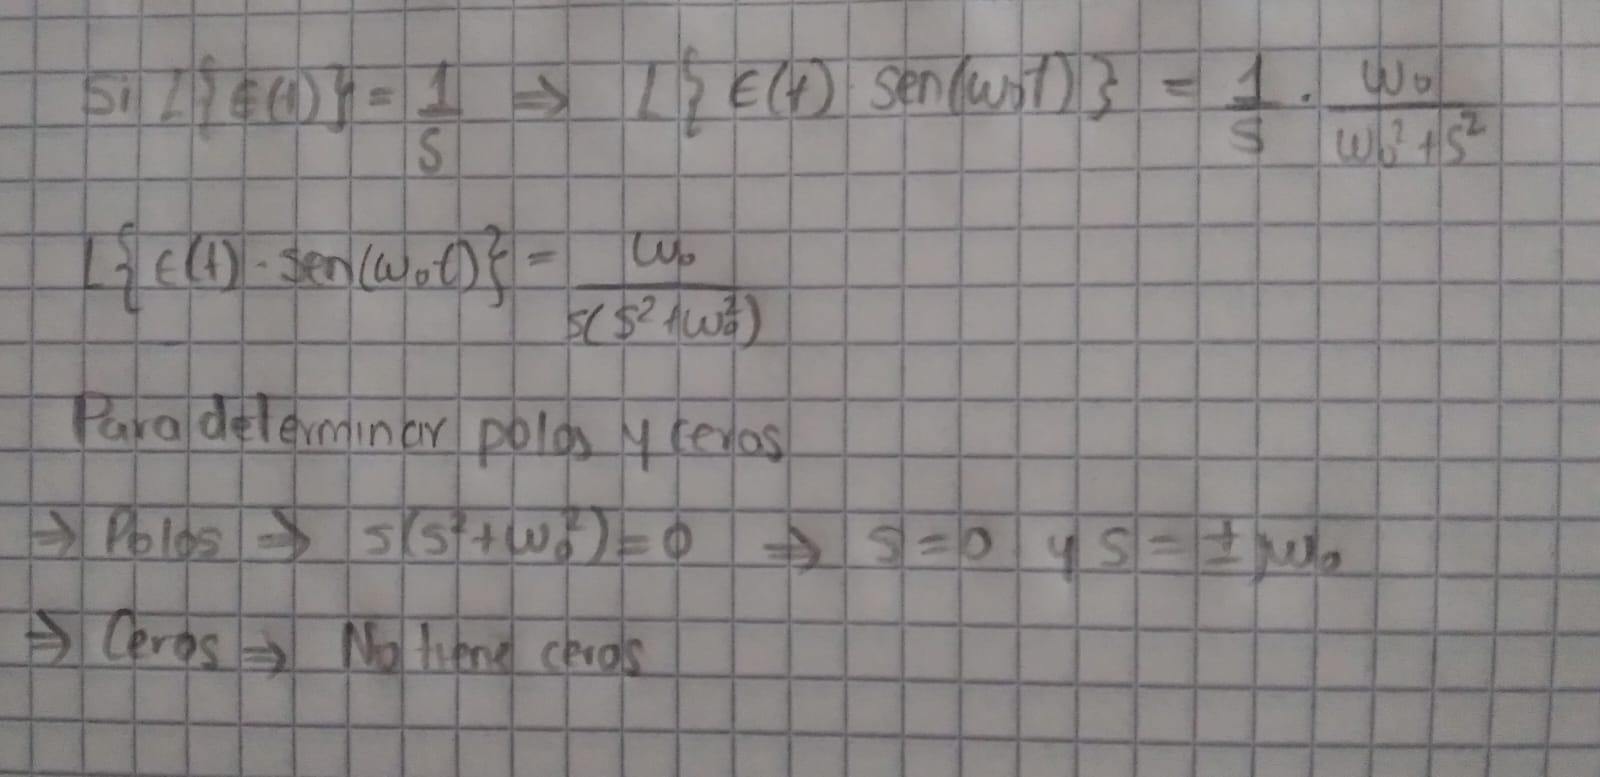


Dado la forma de X(s) y la presencia de polos complejos conjugados $s = \pm j\omega_0$. Se puede concluir que la transformada de Laplace de esta señal real muestra una simetría conjugada compleja en el plano s.

Haciendo uso de las expresiones para la parte real y la parte imaginaria de X(s) en función de R{X(s)} e I{X(s)} entonces:

$R\{X(s)\} = \frac{2s}{2\omega_0}$

$I\{X(s)\} = -\frac{2s^3}{\omega_0^2}$

Se observa que la parte real es par R{X(s)}=R{X(−s)}, y la parte imaginaria es impar I{X(s)}=−I{X(−s)}.



**Polos, Ceros y Simetria parte real e imaginaria en simulación**

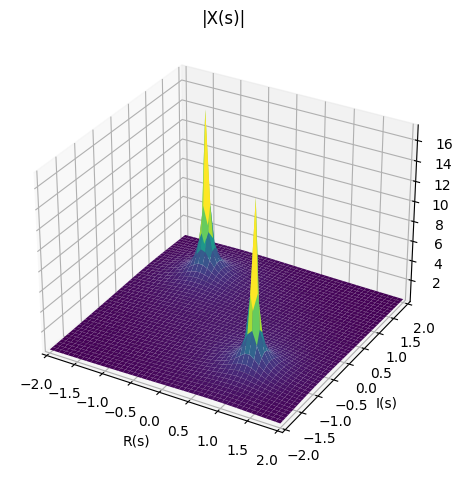

In [2]:
from sympy.plotting import plot3d_parametric_surface
#Graficar la transformada de laplace
s, Wo = sym.symbols(' s Wo', complex = True)
sigma, omega = sym.symbols( 'sigma omega')
X = Wo /(s**2 + Wo**2)
X1 = X.subs({s: sigma+sym.I*omega, Wo: 1+sym.I})
sym.plotting.plot3d(abs(X1), (sigma, -2, 2), (omega, -2, 2), xlabel=r'R(s)', ylabel=r'I(s)', title=r'|X(s)|');

In [3]:
polos = sym.roots(sym.denom(X),s)
polos

{-ⅈ⋅Wo: 1, ⅈ⋅Wo: 1}

In [5]:
ceros = sym.roots(sym.numer(X),s)
ceros

{}

In [6]:
import matplotlib.pyplot as plt

def pole_zero_plot(poles, zeros, ax=None):

    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)

    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)

    plt.axis([-2, 2, -2, 2])
    plt.xlabel(r'R(s)')
    plt.ylabel(r'I(s)')
    plt.grid()

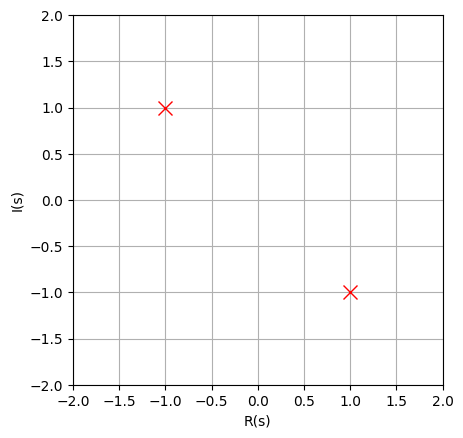

In [8]:
Xcp = X.subs(Wo, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(Xcp), s), sym.roots(sym.numer(Xcp), s))